In [1]:
import os
import ast
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as img
from ultralytics import YOLO

%matplotlib inline

In [2]:
ROOT_PATH = Path(os.getcwd()).parent.as_posix()
DATASET_PATH = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/sdd.yaml").as_posix()
RUN_PATH = Path(ROOT_PATH, "runs").as_posix()
PRETRAINED_PATH = Path(ROOT_PATH, "pretrained").as_posix()
TEST_INPUTS_DIR = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/test/images").as_posix()

## Training

In [3]:
model_name = "yolov8s.pt" # yolov8n.pt yolov8s.pt yolov8m.pt yolov8l.pt yolov8x.pt
model = YOLO(model_name, task="detect")
model.info()

100%|██████████| 21.5M/21.5M [00:00<00:00, 367MB/s]

YOLOv8s summary: 225 layers, 11166560 parameters, 0 gradients


(225, 11166560, 0, 0.0)

In [4]:
train_results = model.train(
    data=DATASET_PATH, 
    epochs=1000, 
    imgsz=512,
    project=RUN_PATH,
    name=None, # YOLOv8s default
)

New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/sdd.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/jovyan/storm-damage-detection/runs, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augme

train: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/train/labels.cache... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 34, len(boxes) = 2746. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]


Plotting labels to /home/jovyan/storm-damage-detection/runs/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to /home/jovyan/storm-damage-detection/runs/train3
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      2.91G      1.991      5.032      1.631        391        512: 100%|██████████| 9/9 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         18        419      0.354      0.228       0.12     0.0664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      2.83G      1.486      1.954      1.273        718        512: 100%|██████████| 9/9 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         18        419      0.185      0.393      0.197      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      3.06G       1.28      1.471       1.16        443        512: 100%|██████████| 9/9 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all         18        419      0.191      0.472       0.26      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000       2.9G      1.216      1.249      1.124        514        512: 100%|██████████| 9/9 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         18        419      0.459      0.236      0.208       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      2.97G      1.195      1.236      1.117        370        512: 100%|██████████| 9/9 [00:01<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all         18        419      0.313      0.398      0.318      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      2.97G      1.215      1.294      1.122        399        512: 100%|██████████| 9/9 [00:01<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all         18        419      0.256      0.633      0.293      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      2.95G      1.175      1.189      1.108        439        512: 100%|██████████| 9/9 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all         18        419        0.3      0.498      0.332      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      2.93G      1.188      1.212      1.124        392        512: 100%|██████████| 9/9 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all         18        419      0.294      0.513      0.345      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      2.87G      1.137      1.158      1.126        520        512: 100%|██████████| 9/9 [00:01<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         18        419      0.397      0.388      0.323      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      2.84G      1.164       1.14      1.143        560        512: 100%|██████████| 9/9 [00:01<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         18        419      0.324      0.405      0.311      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      3.16G      1.126      1.075       1.11        506        512: 100%|██████████| 9/9 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

                   all         18        419      0.289      0.348      0.279      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      2.86G      1.116      1.133      1.102        337        512: 100%|██████████| 9/9 [00:01<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]

                   all         18        419       0.33      0.447       0.33      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      2.97G      1.165      1.126      1.147        283        512: 100%|██████████| 9/9 [00:01<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

                   all         18        419      0.335      0.512      0.336       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000       3.1G      1.119      1.008      1.088        430        512: 100%|██████████| 9/9 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

                   all         18        419      0.254      0.583      0.305      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      3.12G      1.159      1.129      1.126        444        512: 100%|██████████| 9/9 [00:01<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all         18        419      0.269      0.532      0.278      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      2.71G      1.168      1.066      1.127        388        512: 100%|██████████| 9/9 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         18        419      0.285      0.515      0.304      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      2.76G      1.126      1.055      1.115        513        512: 100%|██████████| 9/9 [00:01<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all         18        419       0.34      0.445      0.351      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      2.93G      1.072     0.9383       1.07        451        512: 100%|██████████| 9/9 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]

                   all         18        419      0.307      0.534      0.354      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      2.84G      1.056     0.9685      1.088        527        512: 100%|██████████| 9/9 [00:01<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all         18        419      0.341      0.689       0.39      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      2.77G      1.093      1.012      1.105        468        512: 100%|██████████| 9/9 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         18        419      0.251      0.582      0.287      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      2.79G       1.13      1.034      1.128        326        512: 100%|██████████| 9/9 [00:01<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all         18        419      0.325      0.392      0.331      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      2.92G      1.058     0.9279      1.081        454        512: 100%|██████████| 9/9 [00:01<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         18        419      0.275      0.413      0.333      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      2.69G      1.088     0.9411      1.095        415        512: 100%|██████████| 9/9 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         18        419      0.368       0.39      0.373      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      2.88G       1.05     0.9519      1.062        406        512: 100%|██████████| 9/9 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]

                   all         18        419      0.377      0.598      0.379      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      3.08G      1.084     0.9357      1.086        608        512: 100%|██████████| 9/9 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all         18        419       0.31      0.657      0.402      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      2.85G      1.087      0.951      1.085        308        512: 100%|██████████| 9/9 [00:01<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]

                   all         18        419      0.281      0.626      0.372       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      2.95G      1.097     0.9745       1.09        299        512: 100%|██████████| 9/9 [00:01<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]

                   all         18        419      0.279      0.576      0.345      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      2.78G      1.119      1.003      1.115        437        512: 100%|██████████| 9/9 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         18        419      0.318      0.594      0.375      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      2.93G      1.043     0.9665      1.068        555        512: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         18        419      0.292      0.611      0.385      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      2.87G      1.022     0.9186      1.077        392        512: 100%|██████████| 9/9 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         18        419      0.391      0.562      0.395      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      2.67G      1.017     0.8729      1.068        335        512: 100%|██████████| 9/9 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all         18        419      0.596      0.482      0.472      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      3.17G      1.092     0.9324      1.104        394        512: 100%|██████████| 9/9 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all         18        419      0.477       0.48      0.424      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      2.77G      1.021     0.8839      1.064        309        512: 100%|██████████| 9/9 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all         18        419      0.437      0.506      0.447      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      2.99G      1.015     0.8673       1.06        707        512: 100%|██████████| 9/9 [00:01<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         18        419      0.472      0.417      0.431       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      2.87G      1.034     0.8899      1.085        499        512: 100%|██████████| 9/9 [00:01<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         18        419      0.355      0.623      0.392      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      2.77G      1.041      0.912      1.081        269        512: 100%|██████████| 9/9 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all         18        419      0.436      0.463       0.36      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      2.81G      1.016     0.8797       1.06        312        512: 100%|██████████| 9/9 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         18        419      0.366       0.61      0.398      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      2.95G     0.9874     0.8223      1.045        419        512: 100%|██████████| 9/9 [00:01<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         18        419      0.372      0.482      0.432      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      2.95G     0.9795      0.825      1.026        424        512: 100%|██████████| 9/9 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]

                   all         18        419      0.407      0.627      0.424      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      3.02G     0.9824     0.7949      1.039        440        512: 100%|██████████| 9/9 [00:01<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         18        419      0.445      0.456      0.354      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      2.72G      1.003      0.834      1.066        574        512: 100%|██████████| 9/9 [00:01<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]

                   all         18        419      0.306      0.493      0.316      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      2.75G     0.9782     0.8656      1.044        509        512: 100%|██████████| 9/9 [00:01<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         18        419      0.339      0.512      0.326      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      2.94G     0.9899     0.8344      1.041        470        512: 100%|██████████| 9/9 [00:01<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         18        419      0.403      0.451      0.361      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      2.93G     0.9777     0.8115      1.028        358        512: 100%|██████████| 9/9 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         18        419      0.249      0.539      0.318      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      2.92G     0.9862     0.8309      1.044        607        512: 100%|██████████| 9/9 [00:01<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         18        419        0.4      0.467      0.372      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      2.72G     0.9796     0.8017      1.058        477        512: 100%|██████████| 9/9 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all         18        419      0.308      0.519      0.384      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      2.88G      1.011     0.8351      1.068        392        512: 100%|██████████| 9/9 [00:01<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         18        419      0.383      0.463      0.384      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      2.87G      1.015     0.8002      1.055        404        512: 100%|██████████| 9/9 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         18        419      0.366       0.38      0.356      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      2.96G     0.9702     0.7518      1.038        413        512: 100%|██████████| 9/9 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all         18        419      0.294      0.515       0.37       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      3.23G      1.006     0.7929       1.06        278        512: 100%|██████████| 9/9 [00:01<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all         18        419      0.308      0.448      0.346      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      2.73G     0.9965      0.811      1.034        321        512: 100%|██████████| 9/9 [00:01<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         18        419      0.284      0.454      0.329      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      2.73G      0.982     0.7625      1.053        326        512: 100%|██████████| 9/9 [00:01<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all         18        419      0.355      0.605      0.366      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      3.09G     0.9581     0.7347      1.014        355        512: 100%|██████████| 9/9 [00:01<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         18        419      0.389      0.524      0.382      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      2.84G     0.9764     0.7756      1.039        335        512: 100%|██████████| 9/9 [00:01<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]

                   all         18        419      0.411      0.484      0.369      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      2.86G     0.9534     0.7742      1.032        285        512: 100%|██████████| 9/9 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all         18        419      0.379      0.469      0.364      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      3.08G      1.001     0.8039      1.066        488        512: 100%|██████████| 9/9 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all         18        419      0.314      0.571      0.352      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      2.76G     0.9385     0.7225       1.02        363        512: 100%|██████████| 9/9 [00:01<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all         18        419      0.344      0.612       0.38      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      3.05G     0.9735     0.7678      1.043        368        512: 100%|██████████| 9/9 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         18        419      0.539      0.466      0.454      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      2.98G     0.9288     0.7173      1.015        350        512: 100%|██████████| 9/9 [00:01<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         18        419      0.493      0.452      0.457       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      2.88G       0.97     0.7625      1.049        383        512: 100%|██████████| 9/9 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         18        419       0.35      0.433      0.378      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      3.11G     0.9576      0.734      1.022        352        512: 100%|██████████| 9/9 [00:01<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         18        419      0.343      0.556      0.361      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      2.67G     0.9552     0.7788      1.041        492        512: 100%|██████████| 9/9 [00:01<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         18        419      0.377      0.511      0.378      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      2.79G     0.9159     0.7118       1.01        375        512: 100%|██████████| 9/9 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         18        419      0.382      0.394      0.353      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      2.77G     0.9318     0.7233      1.033        463        512: 100%|██████████| 9/9 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all         18        419      0.329      0.445      0.356      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      2.99G     0.9487     0.7844      1.037        250        512: 100%|██████████| 9/9 [00:01<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         18        419      0.373      0.407      0.364       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      3.13G     0.9294      0.702      1.018        493        512: 100%|██████████| 9/9 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         18        419      0.327      0.455      0.364      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      3.13G     0.9349     0.6963      1.014        442        512: 100%|██████████| 9/9 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]

                   all         18        419       0.35      0.394      0.328      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      3.38G     0.9544     0.7144       1.02        424        512: 100%|██████████| 9/9 [00:01<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         18        419      0.291       0.54      0.313      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000       2.9G     0.9074     0.7141      1.012        382        512: 100%|██████████| 9/9 [00:01<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]

                   all         18        419      0.385      0.476      0.358      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      3.07G     0.8908     0.7112      1.013        375        512: 100%|██████████| 9/9 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]

                   all         18        419      0.368      0.504      0.424      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      2.96G     0.9142     0.6746      1.014        424        512: 100%|██████████| 9/9 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         18        419      0.383      0.533       0.42      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000       2.9G     0.9233     0.6957      1.014        383        512: 100%|██████████| 9/9 [00:01<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all         18        419      0.392      0.556      0.385      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      2.94G     0.9704     0.7496      1.061        308        512: 100%|██████████| 9/9 [00:01<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all         18        419      0.319      0.657      0.361      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      2.92G     0.9378     0.7381      1.009        456        512: 100%|██████████| 9/9 [00:01<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         18        419      0.298      0.616      0.374      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      2.96G     0.9703     0.7213       1.05        373        512: 100%|██████████| 9/9 [00:01<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all         18        419      0.389       0.51      0.393       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      2.84G     0.9694     0.7268      1.033        387        512: 100%|██████████| 9/9 [00:01<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all         18        419      0.377      0.559      0.407      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      2.83G     0.9581     0.7028      1.045        435        512: 100%|██████████| 9/9 [00:01<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         18        419      0.454      0.573      0.497      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      2.73G     0.9845     0.7297      1.063        319        512: 100%|██████████| 9/9 [00:01<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]

                   all         18        419      0.545      0.549      0.482      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      2.95G     0.9898     0.6989       1.05        404        512: 100%|██████████| 9/9 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


                   all         18        419      0.459      0.444      0.434      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      2.91G     0.9656     0.6847      1.033        307        512: 100%|██████████| 9/9 [00:01<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         18        419      0.336      0.547      0.391      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      2.89G     0.9277     0.6586      1.022        398        512: 100%|██████████| 9/9 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         18        419      0.353      0.556      0.412      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      2.91G     0.9189     0.6328       1.01        455        512: 100%|██████████| 9/9 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         18        419      0.405      0.636       0.46      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      2.92G     0.8705     0.6682     0.9997        522        512: 100%|██████████| 9/9 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         18        419      0.492      0.414      0.437      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      2.94G     0.8746     0.6716     0.9981        416        512: 100%|██████████| 9/9 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]

                   all         18        419      0.406      0.503      0.413      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      3.05G     0.8624      0.619     0.9859        396        512: 100%|██████████| 9/9 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all         18        419      0.429      0.472      0.393      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      2.94G     0.8553       0.62     0.9896        567        512: 100%|██████████| 9/9 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         18        419      0.362      0.543      0.392       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000         3G     0.8917     0.6417       1.01        430        512: 100%|██████████| 9/9 [00:01<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         18        419      0.447      0.408      0.409      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      2.69G     0.8746     0.6389     0.9947        349        512: 100%|██████████| 9/9 [00:01<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all         18        419      0.415      0.404      0.387      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      2.68G     0.9001     0.6851       1.02        502        512: 100%|██████████| 9/9 [00:01<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]

                   all         18        419      0.423      0.488       0.37       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      2.91G     0.8729     0.6611     0.9938        456        512: 100%|██████████| 9/9 [00:01<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         18        419      0.426      0.554      0.424      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      2.95G     0.8985     0.6256       1.01        381        512: 100%|██████████| 9/9 [00:01<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all         18        419      0.473      0.569      0.454       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      2.88G     0.8899     0.6337          1        369        512: 100%|██████████| 9/9 [00:01<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         18        419      0.402      0.533      0.397      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      2.71G     0.9191     0.6502      1.021        297        512: 100%|██████████| 9/9 [00:01<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all         18        419      0.408      0.496      0.374      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000       3.1G     0.8902     0.6199       0.99        413        512: 100%|██████████| 9/9 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all         18        419      0.352      0.579      0.374      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      3.03G     0.8603     0.6007     0.9941        392        512: 100%|██████████| 9/9 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all         18        419      0.368      0.459      0.375      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      3.13G     0.9039     0.6157      1.002        487        512: 100%|██████████| 9/9 [00:01<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         18        419      0.341      0.607      0.409      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      2.73G     0.8407     0.6081     0.9856        234        512: 100%|██████████| 9/9 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]

                   all         18        419      0.509       0.45      0.428      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      2.97G     0.8582     0.5902     0.9925        448        512: 100%|██████████| 9/9 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         18        419      0.406      0.518      0.401      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      2.68G     0.8664     0.5762      0.995        398        512: 100%|██████████| 9/9 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all         18        419       0.36      0.607      0.415      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      2.68G     0.8735     0.5864     0.9962        410        512: 100%|██████████| 9/9 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         18        419      0.359      0.605      0.437      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      2.89G     0.8118      0.577     0.9635        457        512: 100%|██████████| 9/9 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all         18        419      0.363      0.543      0.419      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000       2.8G     0.8658     0.6077     0.9979        463        512: 100%|██████████| 9/9 [00:01<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         18        419      0.377      0.562      0.408      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      2.85G     0.8526     0.6118     0.9843        295        512: 100%|██████████| 9/9 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         18        419       0.42      0.468      0.379      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000       2.9G      0.879     0.6292     0.9948        432        512: 100%|██████████| 9/9 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.21it/s]

                   all         18        419      0.417      0.424       0.37      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      2.96G     0.9019     0.6083      1.011        572        512: 100%|██████████| 9/9 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         18        419      0.382      0.496      0.364       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      2.68G     0.8816     0.6188      1.008        317        512: 100%|██████████| 9/9 [00:01<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         18        419      0.318      0.535      0.372      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      2.95G     0.8721     0.5999          1        404        512: 100%|██████████| 9/9 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         18        419      0.323       0.59      0.375      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      2.96G     0.8448     0.5841     0.9887        442        512: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]

                   all         18        419      0.395      0.531      0.404      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      3.15G     0.8563     0.5913          1        397        512: 100%|██████████| 9/9 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         18        419      0.497      0.432      0.445      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      2.91G     0.8305     0.5756     0.9815        450        512: 100%|██████████| 9/9 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         18        419      0.519      0.401      0.445      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000       2.7G     0.8717     0.5912     0.9861        518        512: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         18        419      0.391      0.437      0.416      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      2.79G     0.8832     0.6126      1.005        442        512: 100%|██████████| 9/9 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

                   all         18        419      0.721      0.343      0.367      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      3.03G     0.8803     0.6115     0.9891        447        512: 100%|██████████| 9/9 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         18        419      0.412      0.394      0.353      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      2.84G     0.8792     0.6014     0.9998        381        512: 100%|██████████| 9/9 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all         18        419       0.36      0.443      0.359      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      2.68G     0.8646     0.5869     0.9841        410        512: 100%|██████████| 9/9 [00:01<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all         18        419      0.448      0.402      0.377      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      3.17G     0.8936     0.6125      1.003        369        512: 100%|██████████| 9/9 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         18        419      0.346      0.539      0.402      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      2.86G     0.8834     0.6172     0.9824        378        512: 100%|██████████| 9/9 [00:01<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         18        419      0.407       0.45      0.397      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000       2.9G     0.8562     0.6016     0.9733        404        512: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         18        419      0.357      0.477      0.399      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      2.88G     0.8721     0.5729     0.9787        548        512: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         18        419      0.496      0.386      0.378      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000       3.4G     0.8476     0.5689     0.9614        559        512: 100%|██████████| 9/9 [00:01<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         18        419      0.487      0.437      0.411      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      3.21G     0.8576     0.5754     0.9713        418        512: 100%|██████████| 9/9 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]

                   all         18        419      0.523      0.454      0.459      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      2.77G     0.8286     0.5558     0.9721        496        512: 100%|██████████| 9/9 [00:01<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all         18        419      0.471      0.483      0.471      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000       3.1G     0.8391     0.5537     0.9696        384        512: 100%|██████████| 9/9 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all         18        419      0.471      0.517      0.444      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      2.94G     0.8448     0.5624     0.9822        410        512: 100%|██████████| 9/9 [00:01<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]

                   all         18        419      0.445      0.425      0.403      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000         3G     0.8091     0.5395     0.9619        569        512: 100%|██████████| 9/9 [00:01<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]

                   all         18        419      0.525      0.432      0.414      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      2.67G     0.8416     0.5433     0.9734        515        512: 100%|██████████| 9/9 [00:01<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all         18        419      0.425      0.507      0.409        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      3.04G      0.814     0.5515     0.9711        363        512: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all         18        419      0.357      0.556      0.387      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      2.92G     0.8309     0.5577     0.9623        444        512: 100%|██████████| 9/9 [00:01<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]

                   all         18        419      0.404      0.419        0.4       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      2.69G     0.8208     0.5513     0.9755        549        512: 100%|██████████| 9/9 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         18        419      0.323      0.493      0.393      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      2.91G     0.8223     0.5195     0.9651        559        512: 100%|██████████| 9/9 [00:01<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all         18        419      0.335      0.523      0.382       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      2.97G     0.8114     0.5482     0.9641        533        512: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         18        419      0.407      0.519      0.407      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      2.87G     0.8335     0.5863     0.9938        439        512: 100%|██████████| 9/9 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]

                   all         18        419      0.462      0.459      0.423      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      2.69G     0.8157     0.5482       0.96        389        512: 100%|██████████| 9/9 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         18        419      0.439      0.547      0.455      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      2.87G     0.7933     0.5389     0.9561        426        512: 100%|██████████| 9/9 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         18        419      0.537      0.471      0.444      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      3.18G     0.8208     0.5539     0.9607        581        512: 100%|██████████| 9/9 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]

                   all         18        419      0.577       0.47      0.459      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      2.85G     0.8213     0.5405     0.9546        421        512: 100%|██████████| 9/9 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all         18        419      0.577      0.434      0.452      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      3.08G     0.8108     0.5625     0.9691        440        512: 100%|██████████| 9/9 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         18        419      0.382      0.534      0.412      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      2.85G     0.8138     0.5528     0.9854        443        512: 100%|██████████| 9/9 [00:01<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         18        419      0.388      0.524      0.405      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      2.72G     0.8134     0.5327     0.9653        575        512: 100%|██████████| 9/9 [00:01<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         18        419      0.437      0.512      0.439      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      2.72G     0.8122      0.532     0.9616        385        512: 100%|██████████| 9/9 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         18        419       0.44      0.438        0.4      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      2.86G     0.7886     0.5175     0.9664        395        512: 100%|██████████| 9/9 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]

                   all         18        419      0.322      0.519      0.388      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      3.08G     0.8086     0.5326     0.9643        366        512: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         18        419      0.342      0.465      0.375      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      3.06G     0.8056     0.5163     0.9542        379        512: 100%|██████████| 9/9 [00:01<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]

                   all         18        419      0.314      0.546      0.368      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      2.91G     0.7949     0.5255     0.9537        361        512: 100%|██████████| 9/9 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         18        419      0.342       0.51      0.362       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      2.96G     0.7641     0.5093     0.9487        474        512: 100%|██████████| 9/9 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         18        419      0.336      0.432      0.361      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      2.94G     0.7666     0.4945     0.9499        352        512: 100%|██████████| 9/9 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]

                   all         18        419      0.316      0.579        0.4      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      2.69G     0.7707     0.5108     0.9444        460        512: 100%|██████████| 9/9 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all         18        419      0.415      0.523      0.427      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      2.79G     0.7828     0.5232     0.9582        287        512: 100%|██████████| 9/9 [00:01<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]

                   all         18        419      0.489      0.425      0.415      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000       2.9G      0.795     0.5322     0.9558        395        512: 100%|██████████| 9/9 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         18        419      0.442      0.524      0.438      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000       2.9G     0.7458     0.4912     0.9328        439        512: 100%|██████████| 9/9 [00:01<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]

                   all         18        419      0.466      0.443      0.422      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      2.67G     0.8018     0.5415     0.9578        450        512: 100%|██████████| 9/9 [00:01<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all         18        419      0.399      0.375      0.409        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      2.92G     0.7904     0.5269      0.958        409        512: 100%|██████████| 9/9 [00:01<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all         18        419      0.336      0.488      0.373      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      2.79G     0.7974     0.5341     0.9607        300        512: 100%|██████████| 9/9 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all         18        419      0.363      0.414      0.383      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      2.88G     0.7854     0.5214     0.9501        417        512: 100%|██████████| 9/9 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         18        419      0.377      0.392      0.377      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      2.81G     0.8024     0.5466     0.9711        315        512: 100%|██████████| 9/9 [00:01<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         18        419      0.344      0.397      0.363      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      3.02G     0.7918     0.5197     0.9552        330        512: 100%|██████████| 9/9 [00:01<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         18        419      0.379      0.489      0.398      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      2.83G     0.7553     0.4931     0.9323        415        512: 100%|██████████| 9/9 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         18        419      0.398      0.463      0.404      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      2.92G     0.7729     0.4937     0.9452        356        512: 100%|██████████| 9/9 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all         18        419      0.629      0.419      0.423      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      2.73G     0.7877     0.5251     0.9555        334        512: 100%|██████████| 9/9 [00:01<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]

                   all         18        419      0.464      0.549      0.448      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      2.84G     0.7488     0.4957     0.9357        563        512: 100%|██████████| 9/9 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all         18        419      0.325      0.577      0.437      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      2.74G     0.7696     0.5223     0.9579        413        512: 100%|██████████| 9/9 [00:01<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         18        419      0.426      0.479      0.435      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      2.67G     0.7572     0.4988     0.9445        347        512: 100%|██████████| 9/9 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]

                   all         18        419       0.38      0.582      0.447       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      2.75G      0.752     0.4956     0.9384        395        512: 100%|██████████| 9/9 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all         18        419      0.519      0.487       0.45      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      2.79G     0.7944     0.5173     0.9479        543        512: 100%|██████████| 9/9 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]

                   all         18        419      0.564      0.431      0.455      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      2.88G     0.7775      0.505     0.9565        337        512: 100%|██████████| 9/9 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         18        419      0.617      0.373      0.412      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      2.99G     0.7701     0.5074     0.9393        497        512: 100%|██████████| 9/9 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all         18        419      0.487      0.413      0.413      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      2.86G     0.7641      0.508     0.9474        275        512: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all         18        419       0.48      0.448      0.388      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      2.77G     0.7605     0.4994     0.9447        500        512: 100%|██████████| 9/9 [00:01<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]

                   all         18        419      0.492      0.453      0.413      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      2.95G     0.7413      0.479     0.9353        485        512: 100%|██████████| 9/9 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         18        419      0.538      0.442      0.457      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      2.93G     0.7686     0.5023     0.9469        447        512: 100%|██████████| 9/9 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]

                   all         18        419      0.505      0.437      0.433      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      2.96G     0.7504     0.4943     0.9436        471        512: 100%|██████████| 9/9 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         18        419      0.443      0.466      0.431       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      2.92G     0.7856     0.5037     0.9421        442        512: 100%|██████████| 9/9 [00:01<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all         18        419      0.584      0.428      0.436      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000       2.9G     0.7859     0.5291      0.952        199        512: 100%|██████████| 9/9 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         18        419      0.402      0.521      0.421      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      2.79G     0.7683      0.516     0.9492        355        512: 100%|██████████| 9/9 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]

                   all         18        419      0.477      0.463       0.45      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      3.22G     0.7409     0.4872     0.9385        383        512: 100%|██████████| 9/9 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         18        419       0.52      0.443      0.444      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      2.77G     0.7331     0.4772     0.9379        259        512: 100%|██████████| 9/9 [00:01<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]

                   all         18        419      0.454      0.503      0.451      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      2.96G     0.7707     0.5095     0.9473        490        512: 100%|██████████| 9/9 [00:01<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         18        419       0.51      0.368      0.413      0.293
Stopping training early as no improvement observed in last 100 epochs. Best results observed at epoch 77, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



177 epochs completed in 0.120 hours.
Optimizer stripped from /home/jovyan/storm-damage-detection/runs/train3/weights/last.pt, 22.5MB
Optimizer stripped from /home/jovyan/storm-damage-detection/runs/train3/weights/best.pt, 22.5MB

Validating /home/jovyan/storm-damage-detection/runs/train3/weights/best.pt...
Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


                   all         18        419      0.557      0.536      0.501      0.367
{0: 'damagedcommercialbuilding'}         18          9      0.616      0.189      0.263      0.194
{1: 'damagedresidentialbuilding'}         18         42      0.604      0.364      0.448      0.295
{2: 'undamagedcommercialbuilding'}         18         23      0.274      0.739      0.414      0.296
{3: 'undamagedresidentialbuilding'}         18        345      0.732      0.852      0.876      0.682
Speed: 0.1ms preprocess, 4.1ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /home/jovyan/storm-damage-detection/runs/train3


## Evaluation

In [5]:
# Getting some paths right
save_dir = train_results.save_dir

In [6]:
print(f"mAP with IoU 50% = {train_results.box.map50}")
# 0.4748739270563741
# 0.500642448333702

mAP with IoU 50% = 0.500642448333702


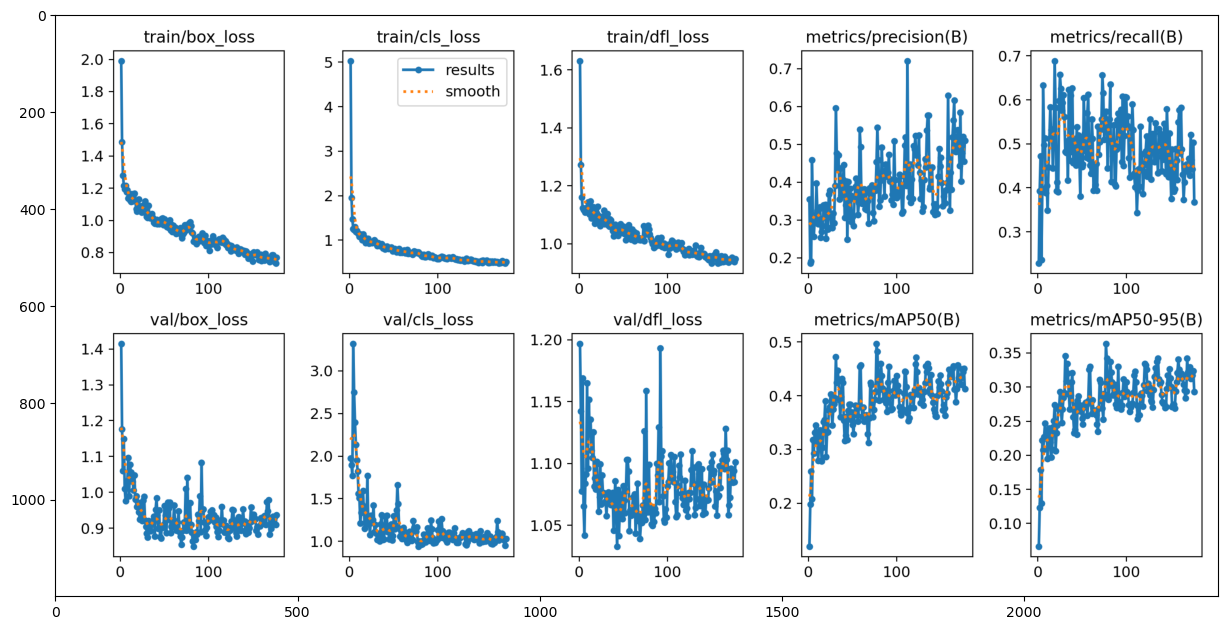

In [7]:
plt.figure(figsize=(15, 10))
results = img.imread(Path(save_dir, "results.png"))   
plt.imshow(results) 
plt.show()

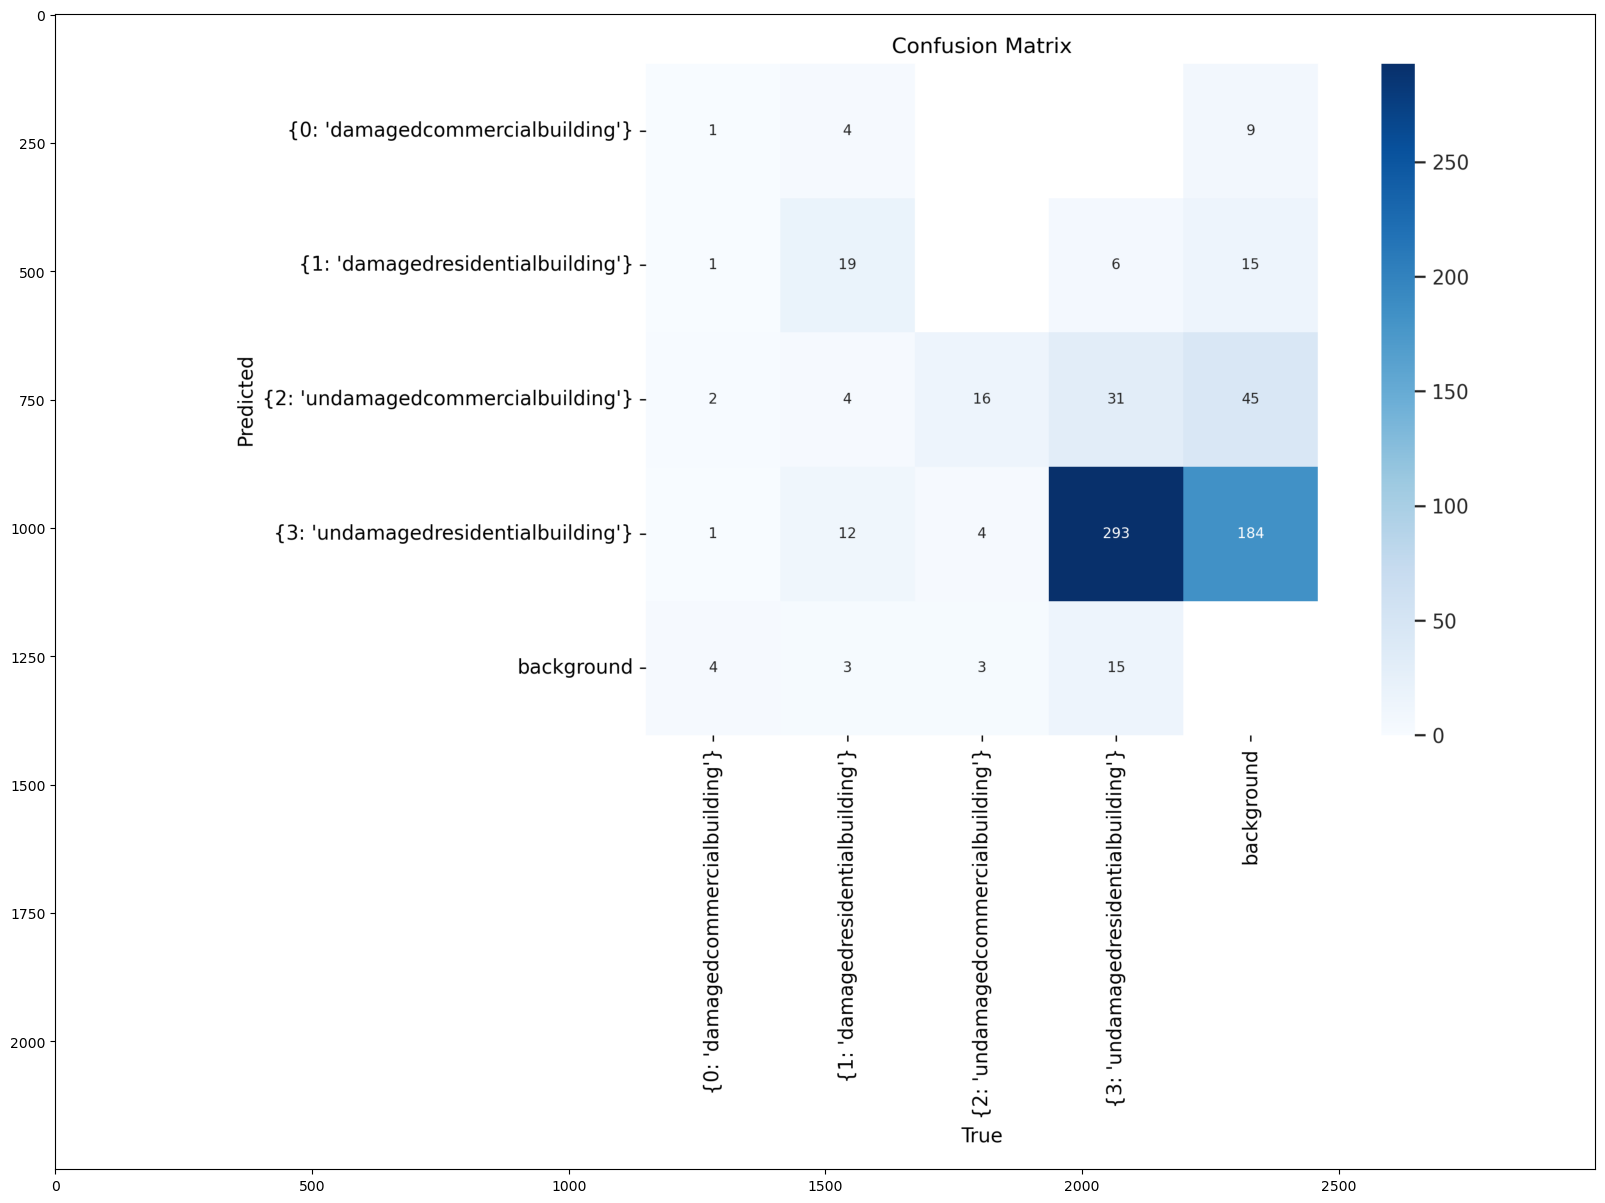

In [8]:
plt.figure(figsize=(20,15))  
# reading the image 
cf = img.imread(Path(save_dir, "confusion_matrix.png")) 
# displaying the image 
plt.imshow(cf) 
plt.show()

## Testing

In [9]:
results_dir = Path(save_dir, "submission_data"); os.makedirs(results_dir, exist_ok=True) # directory to store test output data
best_path = Path(save_dir, "weights/best.pt")

# Double-check with train_results.names
decoding_of_predictions = {0: 'damagedcommercialbuilding', 1: 'damagedresidentialbuilding', 2: 'undamagedcommercialbuilding', 3: 'undamagedresidentialbuilding'}

# Load the current best model
model = YOLO(best_path)

In [10]:
test_results = model.val(
    split="test",
    imgsz=512,
    conf=0.25,
    iou=0.5,
    project=RUN_PATH,
)

Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients


val: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


                   all         12        234      0.372      0.525      0.375      0.295
{0: 'damagedcommercialbuilding'}         12         15      0.167     0.0667      0.111     0.0995
{1: 'damagedresidentialbuilding'}         12         42      0.542      0.429       0.42      0.314
{2: 'undamagedcommercialbuilding'}         12         20      0.175       0.75      0.231      0.173
{3: 'undamagedresidentialbuilding'}         12        157      0.606      0.854      0.737      0.595
Speed: 0.2ms preprocess, 13.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /home/jovyan/storm-damage-detection/runs/val3


In [11]:
test_results = model.predict(
    TEST_INPUTS_DIR,
    imgsz=512, iou=0.5, conf=0.25, 
    save=True, save_txt=True, project=RUN_PATH,
)


image 1/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_001_jpg.rf.816958fdf5bd6099b8a5e2b668d007e9.jpg: 512x512 1 {0: 'damagedcommercialbuilding'}, 3 {1: 'damagedresidentialbuilding'}s, 11 {2: 'undamagedcommercialbuilding'}s, 29 {3: 'undamagedresidentialbuilding'}s, 10.9ms
image 2/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_002_jpg.rf.23111ea1920da9b374c3919e1f423dcd.jpg: 512x512 3 {1: 'damagedresidentialbuilding'}s, 7 {2: 'undamagedcommercialbuilding'}s, 8 {3: 'undamagedresidentialbuilding'}s, 11.0ms
image 3/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_003_jpg.rf.6f70407de0a1ee2cd0f1c8008387e696.jpg: 512x512 7 {1: 'damagedresidentialbuilding'}s, 2 {2: 'undamagedcommercialbuilding'}s, 13 {3: 'undamagedresidentialbuilding'}s, 11.0ms
image 4/12 /home/jovyan/storm-damage-detec

In [12]:
for r in test_results:
    confidences = r.boxes.conf.cpu().numpy().tolist()
    class_indices = r.boxes.cls.cpu().numpy().tolist()
    class_names = [decoding_of_predictions[int(clss_ix)] for clss_ix in class_indices]
    bounding_boxes = r.boxes.xyxy.cpu().numpy()

    # Check if bounding boxes, confidences and class names match
    if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
        print("Error: Number of bounding boxes, confidences, and class names should be the same.")
        continue
    
    text_file_name = os.path.splitext(os.path.basename(r.path))[0] # Get the img filename
    text_file_name = text_file_name.split(".")[0].rstrip("_jpg") # remove extra info in filename produced by roboflow

    # Creating a new .txt file for each image in the submission_directory
    with open(Path(results_dir, f"{text_file_name}.txt"), "w") as file:
        for i in range(len(bounding_boxes)):
            # Get coordinates of each bounding box
            left, top, right, bottom = bounding_boxes[i]
            # Write content to file in desired format
            file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
    print("Output files generated successfully.")
    

Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.


In [13]:
# Define your source directory and the destination where the zip file will be created
destination_zip = Path(results_dir.parent, "submission")

print("source", results_dir)
print("dest", destination_zip)

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', results_dir)

print(f"Directory {results_dir} has been successfully zipped into {destination_zip}.")

source /home/jovyan/storm-damage-detection/runs/train3/submission_data
dest /home/jovyan/storm-damage-detection/runs/train3/submission
Directory /home/jovyan/storm-damage-detection/runs/train3/submission_data has been successfully zipped into /home/jovyan/storm-damage-detection/runs/train3/submission.
